In [1]:
import pandas as pd

bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


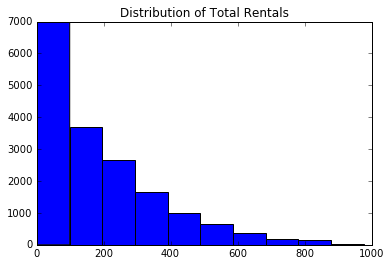

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(bike_rentals['cnt'])
plt.title('Distribution of Total Rentals')
plt.show()

In [3]:
#correlation of each column with total rentals
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [4]:
#group hours into quarters of the day
def assign_label(hour):
    if (hour >= 6) & (hour < 12):
        return 1
    elif (hour >= 12) & (hour < 18):
        return 2
    elif (hour >= 18) & (hour < 24):
        return 3
    else:
        return 4
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

We will use `temp` as an error metric to evaluate the performance of the model used to predict `cnt`. `cnt` is the sum of `registered` and `casual`, and `temp` is the metric with the next highest correlation after those two measures.

In [5]:
#split into train and test
train = bike_rentals.sample(frac=0.8, random_state=1)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [11]:
#train and test linear regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

features = ['season', 'holiday','workingday', 'yr',
            'weathersit', 'temp', 'hum', 'windspeed', 'time_label']
target = 'cnt'
lr = linear_model.LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
error = (mean_squared_error(test[target], predictions))**(1/2)
error

137.55577100087098

The error is quite high for this linear regression model. `cnt` is normally less than 50, and the error is greater than 137.

In [24]:
#train and test decision tree model
from sklearn.tree import DecisionTreeRegressor

features = ['season','workingday', 'yr',
            'weathersit', 'temp', 'hum', 'windspeed', 'time_label']
target = 'cnt'
tree = DecisionTreeRegressor(min_samples_leaf=20)
tree.fit(train[features], train[target])
predictions = tree.predict(test[features])
error = (mean_squared_error(test[target], predictions))**(1/2)
error

113.05331297609197

The error is still high, but it is lower than the error for the linear model.

In [33]:
#train and test random forest model
from sklearn.ensemble import RandomForestRegressor

features = ['season', 'holiday','workingday', 'yr',
            'weathersit', 'temp', 'hum', 'windspeed', 'time_label']
target = 'cnt'
forest = RandomForestRegressor(min_samples_leaf=20, max_depth=20)
forest.fit(train[features], train[target])
predictions = forest.predict(test[features])
error = mean_squared_error(test[target], predictions)**(1/2)
error

111.35827957333909